<a href="https://colab.research.google.com/github/tiaratatyanadewi/Quantium-Virtual-Internship/blob/main/Task_1_Quantium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Quantium: Data Preparation and Customer Analytics

In [ ]:
!gdown 1zSnB2xKXokOObGR2vhDWQVT4Z1hLoaOB

Downloading...
From: https://drive.google.com/uc?id=1zSnB2xKXokOObGR2vhDWQVT4Z1hLoaOB
To: /content/QVI_transaction_data.xlsx
100% 12.0M/12.0M [00:00<00:00, 22.3MB/s]


In [ ]:
!gdown 1SjwGElWmEL8aQv58XUXmMObdmnnNuJy2

Downloading...
From: https://drive.google.com/uc?id=1SjwGElWmEL8aQv58XUXmMObdmnnNuJy2
To: /content/QVI_purchase_behaviour.csv
100% 2.45M/2.45M [00:00<00:00, 57.1MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
transaction = pd.read_excel('/content/QVI_transaction_data.xlsx')
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
transaction['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [ ]:
import re

# Function to parse product info
def parse_product_info(product_str):
    # Search for the serving size (e.g., 175g, 210G)
    serving_size_match = re.search(r'(\d+\s?[gG])', product_str)
    serving_size = serving_size_match.group(1) if serving_size_match else None

    # Remove serving size from the string
    if serving_size:
        product_str = product_str.replace(serving_size, '').strip()

    # The remaining string is considered the product name
    product_name = product_str.strip()

    return {'product_name': product_name, 'serving_size': serving_size}

# Apply the function to the DataFrame
parsed_transaction = transaction['PROD_NAME'].apply(parse_product_info)

# Convert the result to a DataFrame
parsed_transaction_df = pd.DataFrame(parsed_transaction.tolist())


# Display the parsed result
parsed_transaction_df

,product_name,serving_size
0,Natural Chip Compny SeaSalt,175g
1,CCs Nacho Cheese,175g
2,Smiths Crinkle Cut Chips Chicken,170g
3,Smiths Chip Thinly S/Cream&Onion,175g
4,Kettle Tortilla ChpsHny&Jlpno Chili,150g
...,...,...
264831,Kettle Sweet Chilli And Sour Cream,175g
264832,Tostitos Splash Of Lime,175g
264833,Doritos Mexicana,170g
264834,Doritos Corn Chip Mexican Jalapeno,150g


In [ ]:
final_transaction = pd.concat([transaction, parsed_transaction_df], axis=1)
final_transaction = final_transaction.drop('PROD_NAME', axis=1)
final_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,product_name,serving_size
0,43390,1,1000,1,5,2,6.0,Natural Chip Compny SeaSalt,175g
1,43599,1,1307,348,66,3,6.3,CCs Nacho Cheese,175g
2,43605,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170g
3,43329,2,2373,974,69,5,15.0,Smiths Chip Thinly S/Cream&Onion,175g
4,43330,2,2426,1038,108,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150g


In [ ]:
final_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_QTY        264836 non-null  int64  
 6   TOT_SALES       264836 non-null  float64
 7   product_name    264836 non-null  object 
 8   serving_size    264836 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 18.2+ MB


In [ ]:
final_transaction = final_transaction.rename(columns={
    'DATE': 'Transaction Date',
    'STORE_NBR': 'Store Number',
    'LYLTY_CARD_NBR': 'Loyalty Card Number',
    'TXN_ID': 'Transaction ID',
    'PROD_NBR': 'Product Number',
    'PROD_QTY': 'Product Quantity',
    'TOT_SALES': 'Total Sales',
    'product_name': 'Product Name',
    'serving_size': 'Serving Size'
})
final_transaction.head()

,Transaction Date,Store Number,Loyalty Card Number,Transaction ID,Product Number,Product Quantity,Total Sales,Product Name,Serving Size
0,43390,1,1000,1,5,2,6.0,Natural Chip Compny SeaSalt,175g
1,43599,1,1307,348,66,3,6.3,CCs Nacho Cheese,175g
2,43605,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170g
3,43329,2,2373,974,69,5,15.0,Smiths Chip Thinly S/Cream&Onion,175g
4,43330,2,2426,1038,108,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150g


In [ ]:
final_transaction = final_transaction.drop('Transaction Date', axis=1)
final_transaction.head()

,Store Number,Loyalty Card Number,Transaction ID,Product Number,Product Quantity,Total Sales,Product Name,Serving Size
0,1,1000,1,5,2,6.0,Natural Chip Compny SeaSalt,175g
1,1,1307,348,66,3,6.3,CCs Nacho Cheese,175g
2,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170g
3,2,2373,974,69,5,15.0,Smiths Chip Thinly S/Cream&Onion,175g
4,2,2426,1038,108,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150g


In [ ]:
purchase = pd.read_csv('/content/QVI_purchase_behaviour.csv')
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
purchase = purchase.rename(columns={
    'LYLTY_CARD_NBR': 'Loyalty Card Number',
    'PREMIUM_CUSTOMER': 'Premium Customer',
    'LIFESTAGE': 'Lifestage'
})
purchase.head()

,Loyalty Card Number,Lifestage,Premium Customer
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [ ]:
final_df = pd.merge(final_transaction, purchase, on='Loyalty Card Number', how='left')
final_df.head()

,Store Number,Loyalty Card Number,Transaction ID,Product Number,Product Quantity,Total Sales,Product Name,Serving Size,Lifestage,Premium Customer
0,1,1000,1,5,2,6.0,Natural Chip Compny SeaSalt,175g,YOUNG SINGLES/COUPLES,Premium
1,1,1307,348,66,3,6.3,CCs Nacho Cheese,175g,MIDAGE SINGLES/COUPLES,Budget
2,1,1343,383,61,2,2.9,Smiths Crinkle Cut Chips Chicken,170g,MIDAGE SINGLES/COUPLES,Budget
3,2,2373,974,69,5,15.0,Smiths Chip Thinly S/Cream&Onion,175g,MIDAGE SINGLES/COUPLES,Budget
4,2,2426,1038,108,3,13.8,Kettle Tortilla ChpsHny&Jlpno Chili,150g,MIDAGE SINGLES/COUPLES,Budget


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Store Number         264836 non-null  int64  
 1   Loyalty Card Number  264836 non-null  int64  
 2   Transaction ID       264836 non-null  int64  
 3   Product Number       264836 non-null  int64  
 4   Product Quantity     264836 non-null  int64  
 5   Total Sales          264836 non-null  float64
 6   Product Name         264836 non-null  object 
 7   Serving Size         264836 non-null  object 
 8   Lifestage            264836 non-null  object 
 9   Premium Customer     264836 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 20.2+ MB


In [ ]:
final_df.describe()

,Store Number,Loyalty Card Number,Transaction ID,Product Number,Product Quantity,Total Sales
count,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
print(final_df.describe())

       Store Number  Loyalty Card Number  Transaction ID  Product Number  \
count  264836.00000         2.648360e+05    2.648360e+05   264836.000000   
mean      135.08011         1.355495e+05    1.351583e+05       56.583157   
std        76.78418         8.057998e+04    7.813303e+04       32.826638   
min         1.00000         1.000000e+03    1.000000e+00        1.000000   
25%        70.00000         7.002100e+04    6.760150e+04       28.000000   
50%       130.00000         1.303575e+05    1.351375e+05       56.000000   
75%       203.00000         2.030942e+05    2.027012e+05       85.000000   
max       272.00000         2.373711e+06    2.415841e+06      114.000000   

       Product Quantity    Total Sales  
count     264836.000000  264836.000000  
mean           1.907309       7.304200  
std            0.643654       3.083226  
min            1.000000       1.500000  
25%            2.000000       5.400000  
50%            2.000000       7.400000  
75%            2.000000     

In [ ]:
final_df.isnull().sum()

,0
Store Number,0
Loyalty Card Number,0
Transaction ID,0
Product Number,0
Product Quantity,0
Total Sales,0
Product Name,0
Serving Size,0
Lifestage,0
Premium Customer,0


In [ ]:
final_df.describe(include='object')

,Product Name,Serving Size,Lifestage,Premium Customer
count,264836,264836,264836,264836
unique,114,24,7,3
top,Kettle Mozzarella Basil & Pesto,175g,OLDER SINGLES/COUPLES,Mainstream
freq,3304,64929,54479,101988


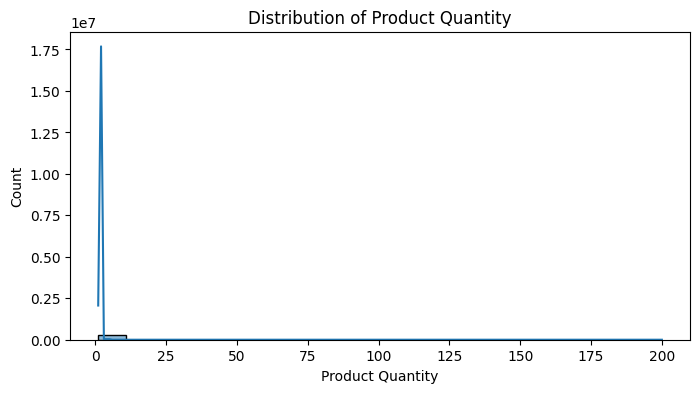

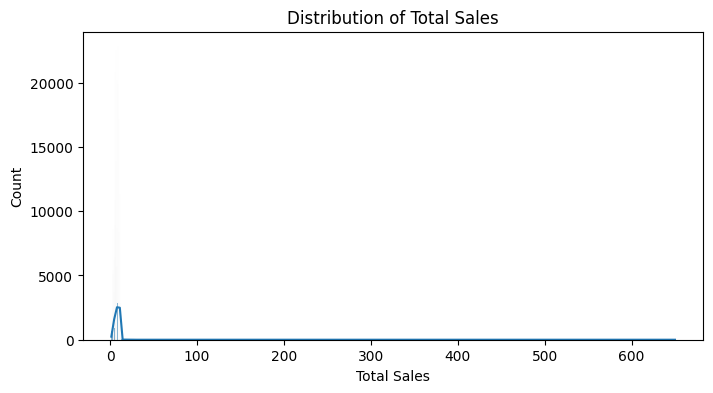

In [ ]:
# Histogram for numerical columns
numerical_columns = ['Product Quantity', 'Total Sales']
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(final_df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.show()

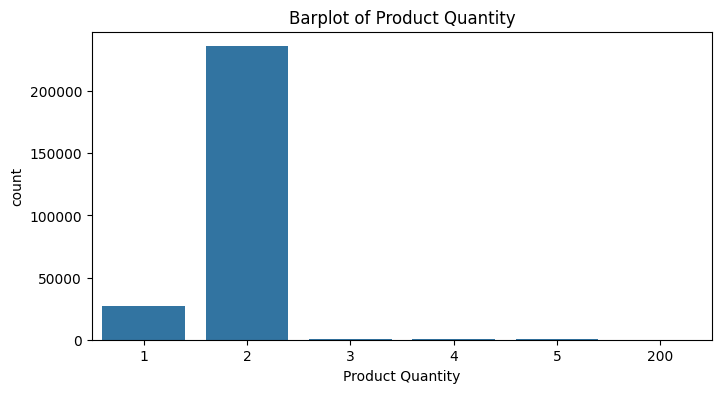

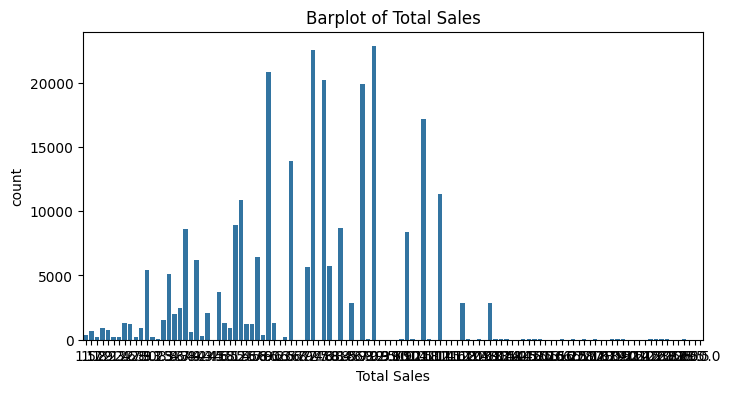

In [ ]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=final_df[column])
    plt.title(f'Barplot of {column}')
    plt.show()

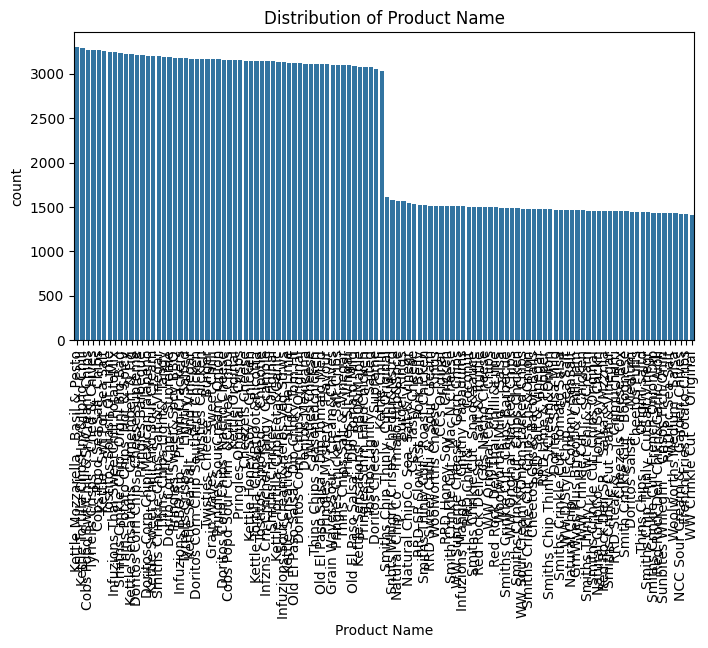

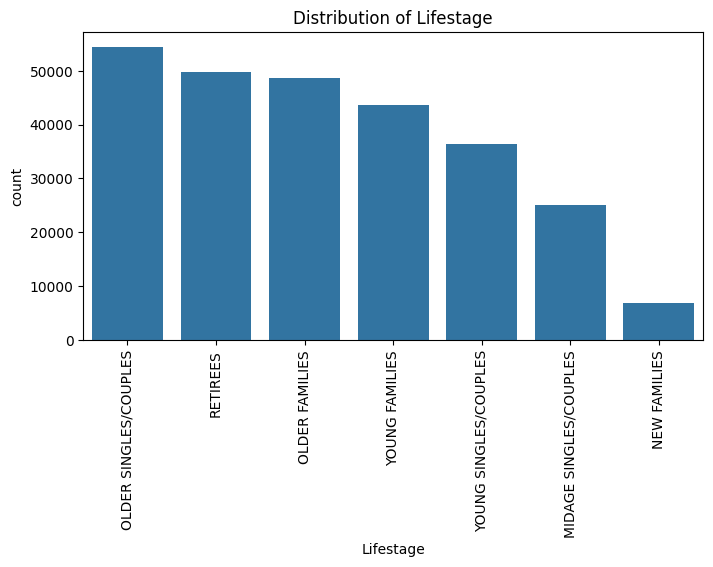

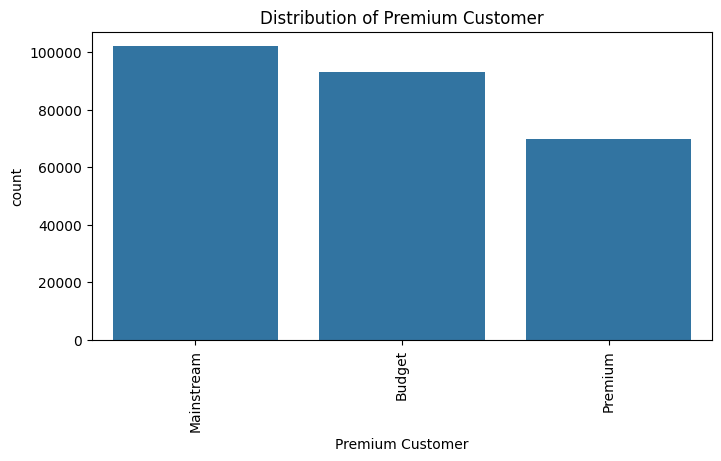

In [ ]:
# Countplot for categorical columns
categorical_columns = ['Product Name', 'Lifestage', 'Premium Customer']
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=final_df, x=column, order=final_df[column].value_counts().index)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

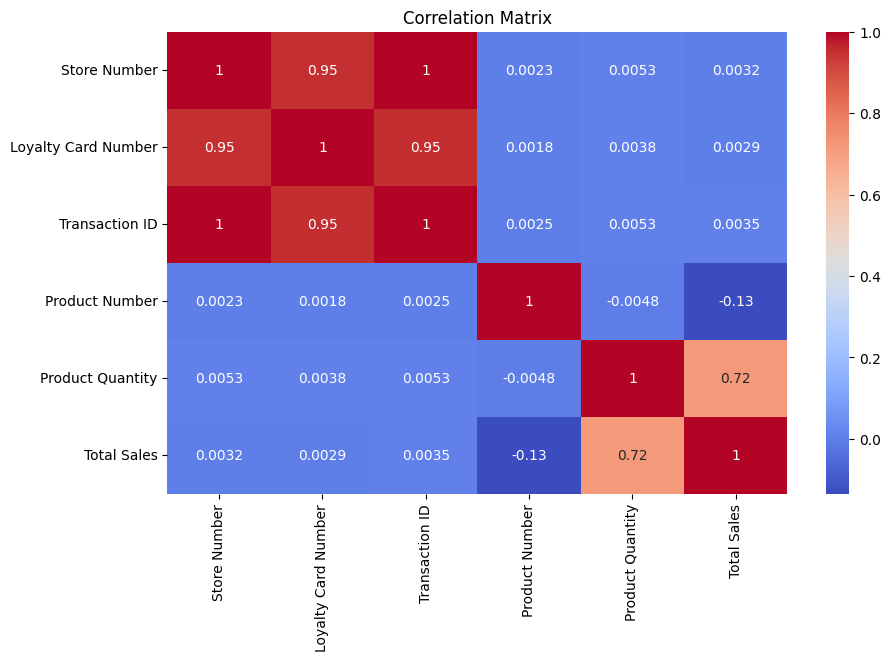

In [ ]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
# Select only numerical columns for correlation calculation
numerical_df = final_df.select_dtypes(include=['number'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

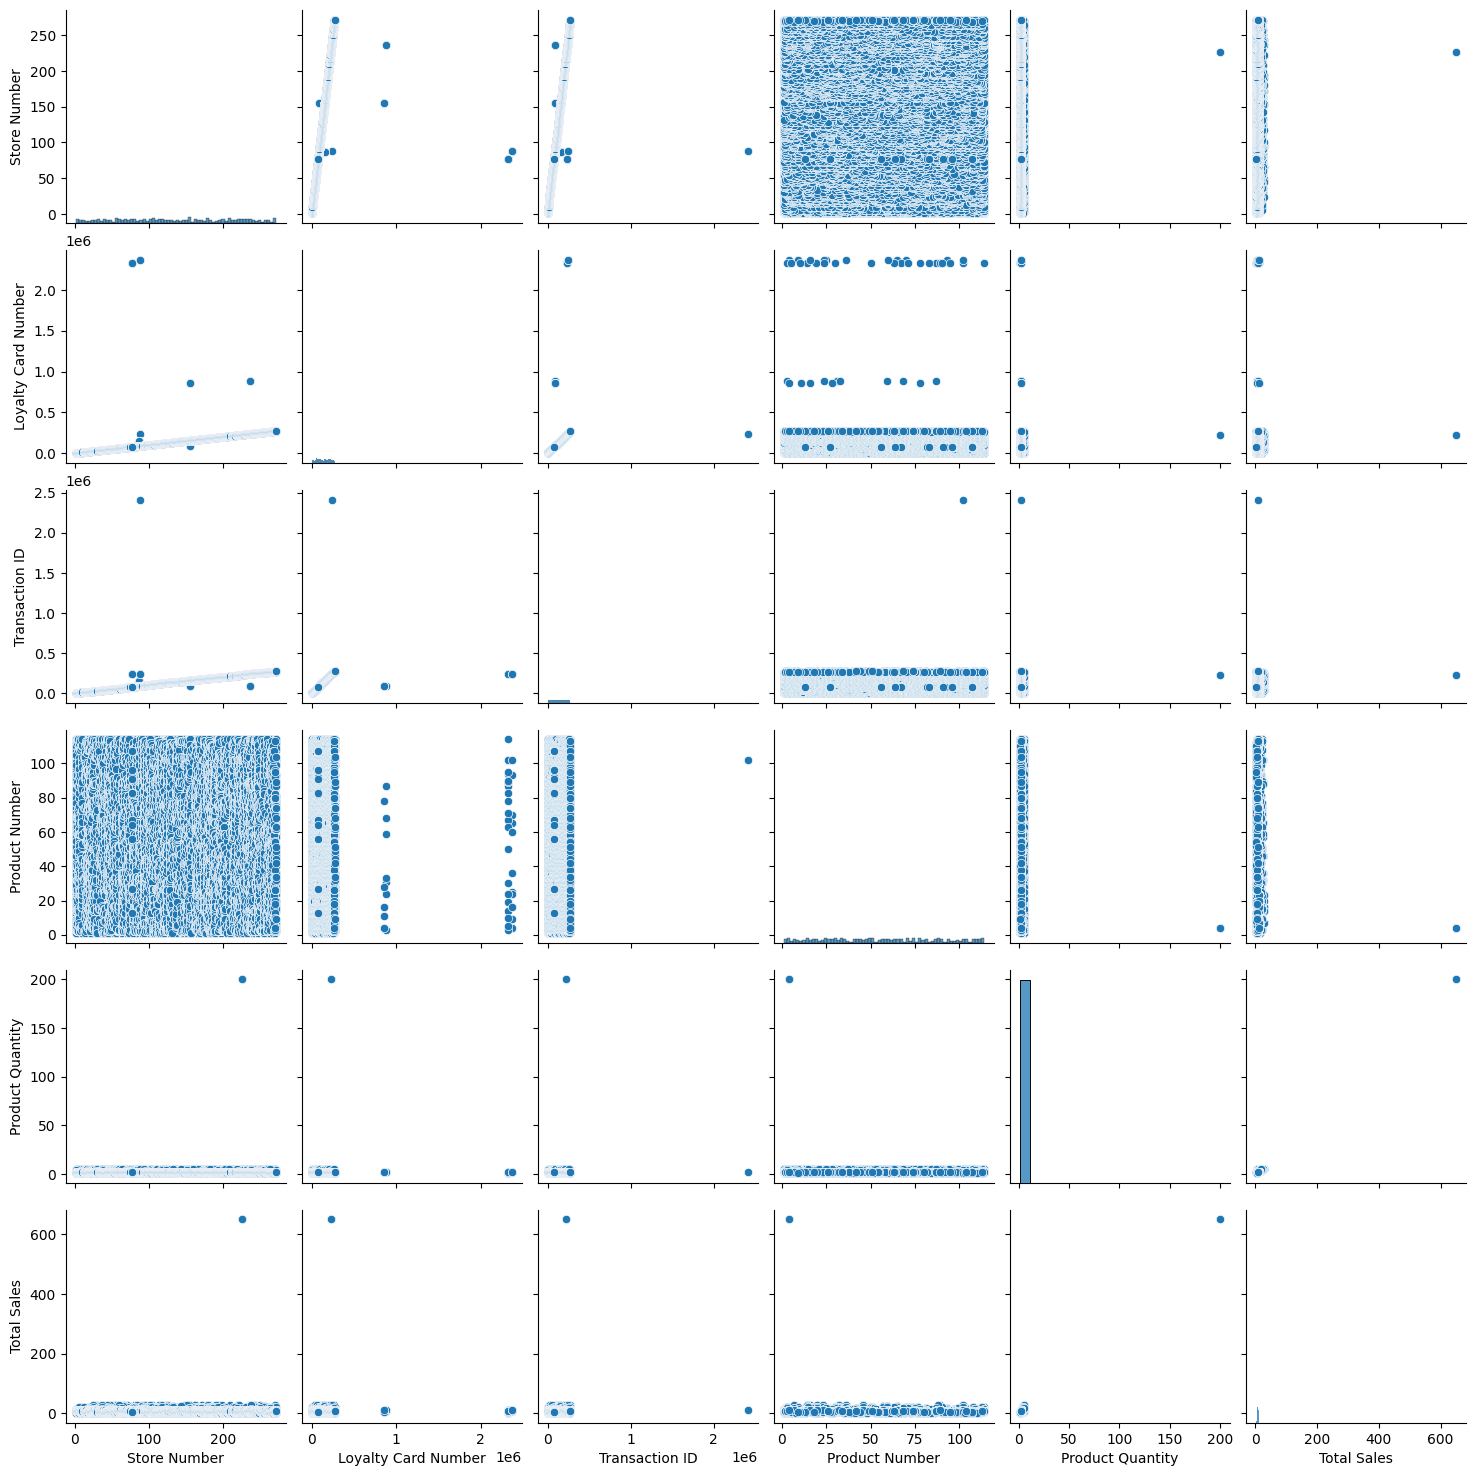

In [ ]:
# Pairplot
sns.pairplot(final_df)
plt.show()

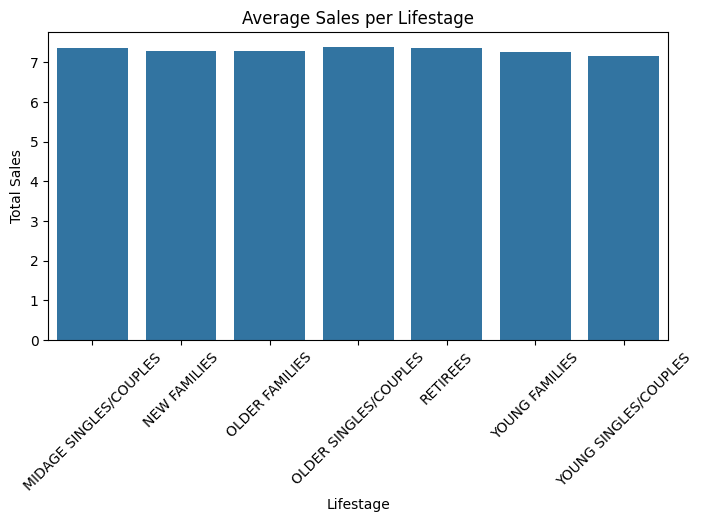

In [ ]:
# Grouping by Lifestage and calculating the mean Total Sales
lifestage_sales = final_df.groupby('Lifestage')['Total Sales'].mean().reset_index()

# Bar plot for average sales per lifestage
plt.figure(figsize=(8, 4))
sns.barplot(data=lifestage_sales, x='Lifestage', y='Total Sales')
plt.title('Average Sales per Lifestage')
plt.xticks(rotation=45)
plt.show()

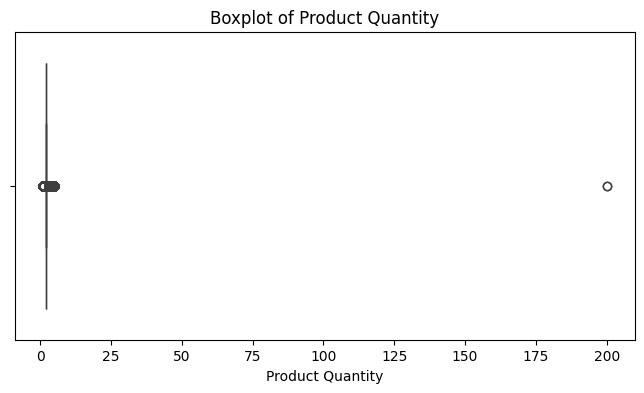

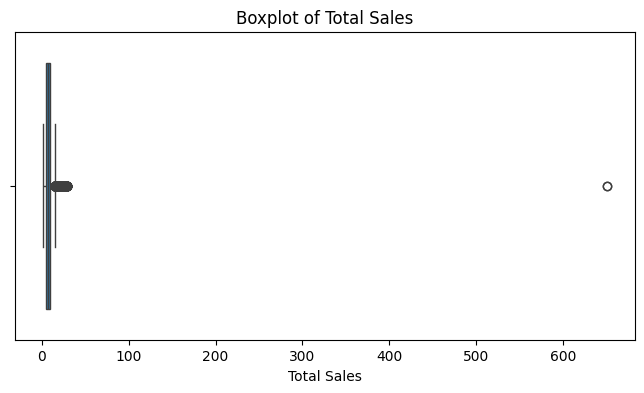

In [ ]:
# Boxplot for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=final_df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

Premium Customer        Budget  Mainstream  Premium
Lifestage                                          
MIDAGE SINGLES/COUPLES    5020       11874     8216
NEW FAMILIES              3005        2325     1589
OLDER FAMILIES           23160       14244    11192
OLDER SINGLES/COUPLES    18407       18318    17754
RETIREES                 15201       21466    13096
YOUNG FAMILIES           19122       12907    11563
YOUNG SINGLES/COUPLES     9242       20854     6281


Text(0, 0.5, 'Count')

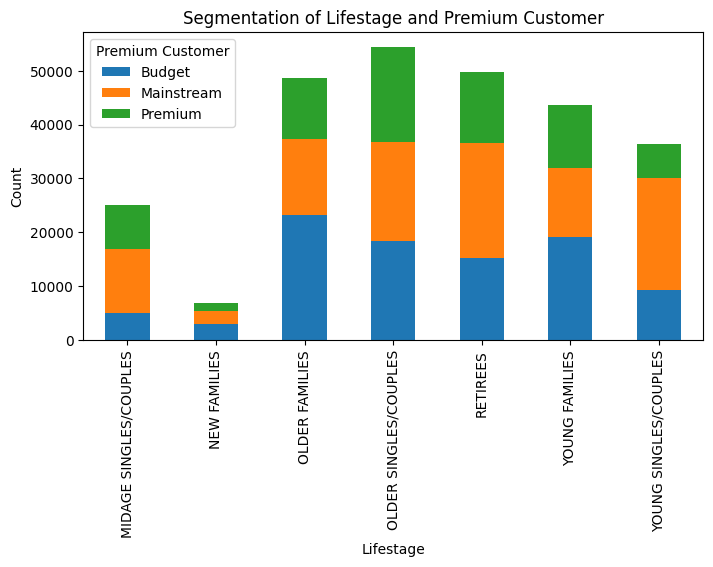

In [ ]:
# Crosstab for Lifestage and Premium Customer
segmentation = pd.crosstab(final_df['Lifestage'], final_df['Premium Customer'])
print(segmentation)

# Bar plot for segmentation
segmentation.plot(kind='bar', stacked=True, figsize=(8, 4))
plt.title('Segmentation of Lifestage and Premium Customer')
plt.xlabel('Lifestage')
plt.ylabel('Count')

##Insights
###Budget Allocation:

* OLDER FAMILIES have the highest budget and premium spend, indicating they might be more financially stable and willing to spend on premium products.
* NEW FAMILIES have the lowest budget and premium spend, suggesting they may be more price-sensitive and have less disposable income.

###Mainstream vs. Premium Spending:

* OLDER SINGLES/COUPLES and OLDER FAMILIES spend significantly more on premium products compared to other lifestages.
* RETIREES have high mainstream spending but lower premium spending compared to their budget size, which might indicate a preference for more cost-effective options.

###High Premium Spending:

* OLDER FAMILIES and OLDER SINGLES/COUPLES show high premium spending relative to their total budget, implying a strong inclination towards premium products.
* YOUNG FAMILIES and YOUNG SINGLES/COUPLES have lower premium spending relative to their budget, which may indicate either less interest in premium products or a focus on budget-friendly options.

##Strategies
###Targeted Marketing Campaigns:

* Older Demographics (OLDER FAMILIES, OLDER SINGLES/COUPLES): Develop marketing campaigns highlighting the benefits of premium products and how they offer long-term value. Emphasize quality and durability.
* Younger Demographics (YOUNG FAMILIES, YOUNG SINGLES/COUPLES): Focus on budget-friendly promotions and value-for-money offers. Highlight cost savings and practicality.

###Product Offerings:

* For RETIREES, consider developing products that offer good value at mainstream prices, as they have higher mainstream spending.
* For NEW FAMILIES, ensure a range of affordable products and consider offering starter packages or discounts to attract them.

###Budget Allocation:

* Older FAMILIES and OLDER SINGLES/COUPLES: Increase the availability of premium products and exclusive deals that cater to their high budget and premium preference.
* Young Demographics: Introduce more budget-friendly premium options or bundles to increase their interest in premium products.

###Customer Loyalty Programs:

* Design loyalty programs or incentives for high-spending lifestages, especially those with a high budget like OLDER FAMILIES and OLDER SINGLES/COUPLES, to encourage repeat purchases and enhance customer retention.

###Product Customization:

* Offer customization or personalized products for segments with higher premium spending to further engage them and boost premium sales.